# Gruppen-Aufgabe 2 Visualiseren

STATUS DER VERSION: "GruppenAufgabe2 Visualiseren_prefinal"
Alle Aufgaben soweit bearbeitet. 
Tippfehler: en masse. Die Berufenen mögen es richten.
Nachvollziehbarkeit der Kommentare muss geprüft werden. Feedback erbeten.

## Welche Arten von Daten sind im Datensatz zu finden? 

Numerische und kategoriale Daten

## Welche Erkenntnisse können Sie mithilfe der Methoden deskriptiver Statistik ziehen?
a) Minimal- und Maximalwert, Mittelwert & Median, Standardabweichung der jeweiligen Variablen 
b) Korrelationen zwischen den zwischen den numerischen Variablen 
c) für eine Variable: Histogramm & Boxplots
    für zwei (oder mehr Variablen): Liniendiagramme, Scatterplots. ...

## Welche Erkenntnisse können Sie durch die verschiedenen Visualisierungsdiagramme ziehen? (angewendet auch auf die folgenden Fragestellungen)         
a) Mit Boxplots können Ausreißer schnell erkannt werden
b) mit Histogrammen die Streuung und Verteilung schnell visualisiert werden
c) mit Heatmaps Korrelationen zwischen allen Variablen erkennen und dann 
d) mit Liniendiagrammen und Scatterplots Korrelationen zwischen zwei Variablen genauer untersuchen

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datensatz laden 
df = pd.read_csv('Employee Attrition and Factors.csv')

## Gibt es fehlende Daten? 

In [75]:
print(df.isnull().sum())


40                          1470
Unnamed: 1                     0
Attrition                      0
BusinessTravel                 0
DailyRate                      0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
EmployeeCount                  0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked             0
Over18                         0
OverTime                       0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
StandardHours                  0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTi

In [76]:
# Es gibt keine fehlenden Daten

In [77]:
# Bereinigung der Ausreißer durch Capping

# Anzahl der Spalten
num_columns = df.shape[1]
        
for spaltenNummer in range(num_columns):
    spalte = df.iloc[:, spaltenNummer].copy() # es wird eine Kopie der jeweiligen Spalte angelegt um an dieser die Werte zu verändern
    try:  # da Perzentille nur für nummerische Werte berechenbar (sonst Fehler)
        percentile25 = spalte.quantile(0.25)
        percentile75 = spalte.quantile(0.75)
        iqr = percentile75 -percentile25
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        
        # Programmablauf-Kontrolle der Grenzen
        # print(f"Spalte {spaltenNummer}: {percentile25} : {percentile75} : {upper_limit} : {lower_limit} : ")
        
        # upper_outliers = spalte[(spalte > upper_limit)] # 
        # Programmablauf-Kontrolle der Anzahl der Ober-Ausreißer vor der Bereinigung
        # print(f"Spalte {spaltenNummer}: Ober-Ausreißer vor der Bereinigung {len(upper_outliers)} von {len(spalte)} ") 
        
        # Capping der Ausreißer auf das obere bzw. untere Quartil
        spalte[(spalte > upper_limit)] = upper_limit
        spalte[(spalte < lower_limit)] = lower_limit
        
        # Programmablauf-Kontrolle der Anzahl der Ober-Ausreißer nach der Bereinigung
        # upper_outliers = spalte[(spalte > upper_limit)]# | spalte < lower_limit)]
        # print(f"Spalte {spaltenNummer}: Ober-Ausreißer nach Bereinigung {len(upper_outliers)} von {len(spalte)} ") 
        
        # Spalte wird in das DataFrame zurück geschrieben
        df.iloc[:, spaltenNummer] = spalte
        
    except (TypeError, ValueError):
        print(f" {spaltenNummer} : Kein numerischer Wert")
        continue
        

 2 : Kein numerischer Wert
 3 : Kein numerischer Wert
 5 : Kein numerischer Wert
 8 : Kein numerischer Wert
 12 : Kein numerischer Wert
 16 : Kein numerischer Wert
 18 : Kein numerischer Wert
 22 : Kein numerischer Wert
 23 : Kein numerischer Wert


# Überprüfen, ob eine Umkodierung sinnvoll ist

In [78]:
# Überprüfung, ob Spalte nicht nummerischne Werte enthält. 
# Sollte hier dann die Zahl der Ausprägungen 1 beträgen, so ist diese Variable nichthilfreich
# Bei zwei Ausprägungen wird durch OneHotEncoder ersetzt
# Bei mehr als zwei Ausprägungen wird es so belassen bis im Kurs eine Encoding-Tabelle behandelt wird

from sklearn.preprocessing import LabelEncoder

mapping_list = [] # Liste für die Sammlung der Mappings der kategorillen Variablen initialisieren


for spaltenNummer in range(num_columns):
    spalte = df.iloc[:, spaltenNummer]
      
    if not pd.api.types.is_numeric_dtype(spalte): # chatGPT: Check if column contains numeric values
        if spalte.value_counts().size == 1:
            print(f"Spalte {spaltenNummer} besteht nur aus einer Ausprägungen und liefert daher keine Infortmationen")
                # sollte in solchen Fällen die Information darin bestehn, dass Eintrag/KeinEintrag diese Info
                # bietet, so müsste man vor der MissingValues-Prozedur eine entsprechende Einkodierung vorgenommen werden             
        #else:
            # um herauszufinden, ob Korrelationen zwischen den Variablen bestehen, müssen auch 
            # kategorielle Variablen bit Zahlen umkodiert werden. Dieses geschieht mittels des LabelEncoders
            # Hier müsste die Kodierungstablle in einem separaten Dictionary festgehalten werden. 
            # Oder alternativ die neue kodierte Spalte direkt hinter die unkodierte Spalte eingefügt werden.

        le = LabelEncoder()
        le_result = le.fit_transform(spalte)
        # Wir verwenden hierzu die classes_-Variable des LabelEncoder [danke chatGPT]
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
                   
            # Überblick über die Kodierungsspalten verschaffen:
        print(f"\n {df.columns[spaltenNummer]} : {mapping} ")  # Name der Spalte und das Mapping
        print(f"\n {spalte.value_counts()} \n")
            
            # Hinzufügen der neuen umkodierten Spalte an das Ende des DataFrames.
            # Hierzu muss zuerst die neue Spalte "le_result" eine neue Überschirft bekommen.
            # Dieses geshciht mit der Panda-Funktion Series [danke chatGPT]
        new_col = pd.Series(le_result, name=f"{df.columns[spaltenNummer]}_encoded")
        df = pd.concat([df, new_col], axis=1)

            # Die kodierte Spalte könnte nun hinter die unkodierte Spalte eingefügt werden,#
            # Das hätte allerings zufolge, dass die Zahl der Spalten erhöht worden wäre.
            # Die for-Schleife würde dann nicht alle Variablen durchlaufen (num_columns ist 
            # bereits vorher fix. Wir entscheiden uns für die Erzeugung einer Mapping-Liste,
            # in der die Mappings der einzelnen kategoriellen Variabeln (in Form von Dictionaries)
            # zusammen gestellt werden.
        mapping_list.append({df.columns[spaltenNummer] : mapping})

#Ausgabe der Mappiung List und des erweiteren DataFrames
print ("---------- Ausagbe der Mapping-Liste ----------------")
print(mapping_list)          

print ("---------- Ausagbe des Heads der hinzugefügten Spalten----------------")
print(df.head(-len(mapping_list)))


            


 Attrition : {'No': 0, 'Yes': 1} 

 No     1233
Yes     237
Name: Attrition, dtype: int64 


 BusinessTravel : {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2} 

 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 


 Department : {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2} 

 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 


 EducationField : {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5} 

 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 


 Gender : {'Female': 0, 'Male': 1} 

 Male      882
Female    588
Name: Gender, dtype: int64 


 JobRole : {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, '

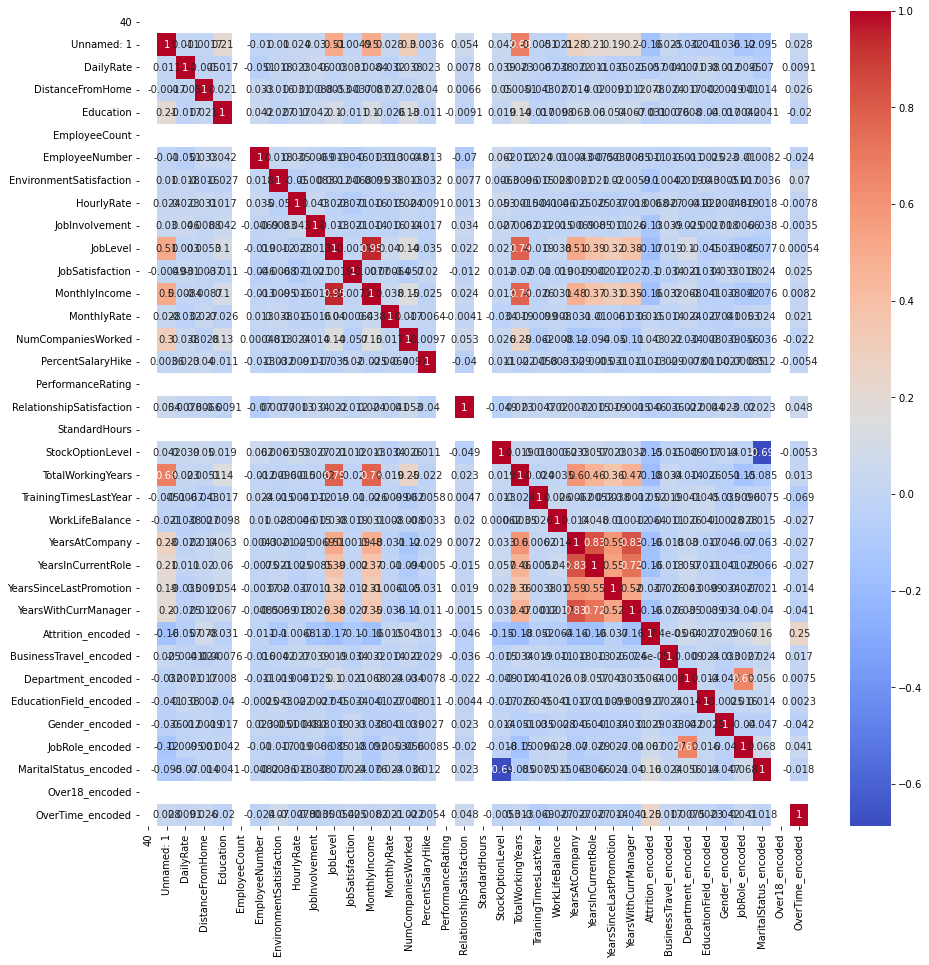

In [79]:
# Korrelationsmatrix erstellen
matrix = df.corr()

# Größe der Heatmap definieren und erstellen
fig = plt.subplots(figsize=(15,15)) # chatGPT
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.show()

zu überlegen: 
hat gab es irgendwo Ausreißer-Beseitigung bei kategoriellen Daten. 
Z.B. Es gibt 100 Männer und 1300 Frauen, die mit einer Zahl kodiert wurden.
Dann würde man die Männer zu Frauen machen...

In [82]:
# Top 25 der höchsten KOrrationskoeffizienten der Matrix
        
import math
top25 = []

# Alle Elemente der Matrix durchgehen und eine Liste der höchsten Werte erstellen
for i in range(len(matrix)):
    for j in range(len(matrix.columns)):
        # nur Werte unterhalb der Matrix-Diagonalen berücksichtigen, auf der anderen Seite der Diagonalen 
        # wäre der gleich Wert zu finden, wodurch es zu Wert-Doppelung kommen würde
        if i > j: 
            wert = matrix.iloc[i,j] # Wert an der Stelle (i,j)
            if len(top25) < 25: # die ersten 10 Felder direkt füllen und sortieren
            
                # Da wo eine der Variablen nicht nummerisch war, 
                # wurde als Korrelation "nan" erzeugt. 
                # Diese Werte sollen nicht in die Liste aufgenommen werden.
                if not math.isnan(wert):
                    top25.append([wert,i,j]) # Wert wird in die Liste hinzugefügt, zusammen mit seinen Koordianten
                    # Liste wird nach absteigenden Absolut-Wert sortiert. Da die Liste aus Unterlisten besteht,
                    # in denen nur der Betrag des ersten Listen-Elements für die Sortierung entschiedend ist,
                    # muss mittels einer anonymen Funktion dieser Wert als "key" abgefragt werden [danke chatGPT]
                top25.sort(key=lambda x: abs(x[0]), reverse=True)  
            else:
                # Der niedrigster (absoluter) Wert der Liste wird  mit dem neuen Wert verglichen
                # Sollte er kleiner sein, wird er gelöscht und durch den neuen Wert ersetzt.
                unteresterTop25 = min(top25, key=lambda x: x[0])[0] # hier muss das erste Element der Unterliste (Wert) verglichen werden
                if abs(unteresterTop25) < abs(wert):
                    del top25[-1] # Wenn der (bisheriger) niedrigster Wert kleiner ist, wird er entfernt
                    top25.append([wert,i,j]) # Neuer Wert mitsamt der Koordianten wird in die Liste eingefügt
                    top25.sort(key=lambda x: abs(x[0]), reverse=True) # Liste wird nach absteigenden Absolut-Werten sortiert (wie oben)


print (f" In der Korrealtionsmatrix gibt es insgesamt {int(len(matrix)*(len(matrix)-1)/2)} Korrealtionspaare.")
print (" Es wurde eine Liste der 25 höchsten Korrelationswerten erzeugt (Reihenfolge absteigend nach Betrag):")
    
    # Die for-Schleifeleiferte eine unübersichtliche Ausgabe, aus diesem Grund chatGPT 
    # for i in top25:
    #   print(i[0], matrix.index[i[1]], matrix.columns[[i[2]]].tolist()[0]) 
    
# Ausgabe in Form einer Tabelle für mehr Übersichtlichkeit [danke chatGPT]    
from tabulate import tabulate
headers = ['Korrelation', 'Variable 1', 'Variable 2']
table_data = [[i[0], matrix.index[i[1]], matrix.columns[i[2]]] for i in top25]
print(tabulate(table_data, headers=headers, tablefmt='grid'))


 In der Korrealtionsmatrix gibt es insgesamt 630 Korrealtionspaare.
 Es wurde eine Liste der 25 höchsten Korrelationswerten erzeugt (Reihenfolge absteigend nach Betrag):
+---------------+-------------------------+-------------------------+
|   Korrelation | Variable 1              | Variable 2              |
+===============+=========================+=========================+
|      0.945557 | MonthlyIncome           | JobLevel                |
+---------------+-------------------------+-------------------------+
|      0.833621 | YearsWithCurrManager    | YearsAtCompany          |
+---------------+-------------------------+-------------------------+
|      0.829616 | YearsInCurrentRole      | YearsAtCompany          |
+---------------+-------------------------+-------------------------+
|      0.786734 | TotalWorkingYears       | JobLevel                |
+---------------+-------------------------+-------------------------+
|      0.776481 | TotalWorkingYears       | MonthlyIncome   

In [89]:
# Korrelation mit der Zielvariable "Attrition" mit jeder anderen Spalte des DataFrames. 
# Es muss die umkodierte "Attrition_encoded" Zielvariable benutzt werrden um eine Korellation zu erhalten
korrelationMitZielvariable = df.corrwith(df['Attrition_encoded'])

print(korrelationMitZielvariable)

40                               NaN
Unnamed: 1                 -0.159205
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.164778
MonthlyRate                 0.015170
NumCompaniesWorked          0.042899
PercentSalaryHike          -0.013478
PerformanceRating                NaN
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.150908
TotalWorkingYears          -0.180628
TrainingTimesLastYear      -0.051666
WorkLifeBalance            -0.063939
YearsAtCompany             -0.162211
YearsInCurrentRole         -0.161484
YearsSinceLastPromotion    -0.037486
YearsWithCurrManager       -0.156498
A

# FAZIT:
## Zu viele Übersunden (OverTime_encoded) und #_ICH_BIN_RAUS

In [ ]:
## Reflexion der Arbeit. 
Oh Mann! 
Und das ist erst der Anfang?!